In [37]:
# import packages for alpaca, panadas and OS/dotenv to read .env file with api keys
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()
import pathlib as Path

In [38]:
# storing alpaca key and secret key in variables 
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version='V2')

In [39]:
# set time frame
timeframe = '1D'

# start and 'end' date for covid stock market 
start_date_covid = pd.Timestamp('2020-01-01',tz='America/New_York').isoformat()
end_date_covid = pd.Timestamp('2020-11-20',tz='America/New_York').isoformat()

# start and end date for 2008 recession 
start_date_2008 = pd.Timestamp('2007-07-01',tz='America/New_York').isoformat()
end_date_2008 = pd.Timestamp('2009-07-01',tz='America/New_York').isoformat()

# set tickers (per industry)
tickers = ['LB','SBUX','COST','AAPL','MSFT','S&P 500']
# financeind_tickers
# techind_tickers etc

# get stock data from covid
covid_ticker = api.get_barset(tickers,timeframe,start=start_date_covid,end = end_date_covid).df

# get stock data from 2008 recession
ticker2008 = api.get_barset(tickers,timeframe,start=start_date_2008,end = end_date_2008).df

In [41]:

sp500_df = pd.read_csv("sp500_data.csv", index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


In [29]:
ticker2008.head()

AAPL                                      COST  \
                             open    high     low   close     volume   open   
2008-01-02 05:00:00+00:00  28.471  28.609  27.507  27.847  263616390  69.66   
2008-01-03 05:00:00+00:00  27.921  28.199  27.527  27.836  204667791  68.52   
2008-01-04 05:00:00+00:00  27.349  27.571  25.556  25.704  352875628  66.85   
2008-01-07 05:00:00+00:00  25.886  26.229  24.319  25.369  509363742  66.09   
2008-01-08 05:00:00+00:00  25.721  26.066  24.400  24.461  371810332  66.01   

                                                         ... S&P 500       \
                            high    low  close   volume  ...    open high   
2008-01-02 05:00:00+00:00  69.78  68.11  68.14  3567780  ...     NaN  NaN   
2008-01-03 05:00:00+00:00  68.88  66.91  67.08  3206878  ...     NaN  NaN   
2008-01-04 05:00:00+00:00  66.90  65.38  65.65  4687459  ...     NaN  NaN   
2008-01-07 05:00:00+00:00  66.64  64.80  65.94  3768707  ...     NaN  NaN   
2008-01-08 05:00:00+00:00  66.87  64.91  64.94  5607442  ...     NaN  NaN   

                                               SBUX                        \
                           low close volume    open    high    low  close   
2008-01-02 05:00:00+00:00  NaN   NaN    NaN  10.085  10.090  9.640  9.655   
2008-01-03 05:00:00+00:00  NaN   NaN    NaN   9.675   9.700  9.000  9.355   
2008-01-04 05:00:00+00:00  NaN   NaN    NaN   9.235   9.270  9.000  9.040   
2008-01-07 05:00:00+00:00  NaN   NaN    NaN   9.150   9.405  9.055  9.195   
2008-01-08 05:00:00+00:00  NaN   NaN    NaN  10.090  10.505  9.915  9.915   

                                      
                              volume  
2008-01-02 05:00:00+00:00   43630132  
2008-01-03 05:00:00+00:00   46061126  
2008-01-04 05:00:00+00:00   38049596  
2008-01-07 05:00:00+00:00   36886624  
2008-01-08 05:00:00+00:00  121578722  

[5 rows x 30 columns]

In [30]:
covid_ticker.tail()

AAPL                                       \
                             open      high      low   close    volume   
2020-11-16 05:00:00+00:00  118.92  120.9900  118.146  120.35  82097057   
2020-11-17 05:00:00+00:00  119.55  120.6741  118.960  119.36  66758426   
2020-11-18 05:00:00+00:00  118.61  119.8200  118.000  118.00  66333033   
2020-11-19 05:00:00+00:00  117.59  119.0600  116.810  118.64  67716820   
2020-11-20 05:00:00+00:00  118.64  118.7700  117.290  117.32  66641286   

                               COST                                     ...  \
                               open      high     low   close   volume  ...   
2020-11-16 05:00:00+00:00  376.9100  381.2800  376.91  378.50   941796  ...   
2020-11-17 05:00:00+00:00  387.3200  388.4800  381.79  381.79  2784463  ...   
2020-11-18 05:00:00+00:00  382.8883  388.0500  381.73  382.04  1770618  ...   
2020-11-19 05:00:00+00:00  383.6100  384.7100  380.31  383.48  1496602  ...   
2020-11-20 05:00:00+00:00  383.9500  385.5023  381.01  381.12  1303174  ...   

                          S&P 500                          SBUX           \
                             open high  low close volume   open     high   
2020-11-16 05:00:00+00:00     NaN  NaN  NaN   NaN    NaN  96.79  97.6750   
2020-11-17 05:00:00+00:00     NaN  NaN  NaN   NaN    NaN  97.21  98.7750   
2020-11-18 05:00:00+00:00     NaN  NaN  NaN   NaN    NaN  98.63  99.3264   
2020-11-19 05:00:00+00:00     NaN  NaN  NaN   NaN    NaN  97.24  97.9200   
2020-11-20 05:00:00+00:00     NaN  NaN  NaN   NaN    NaN  97.42  97.5388   

                                                    
                               low  close   volume  
2020-11-16 05:00:00+00:00  96.0200  97.18  5358882  
2020-11-17 05:00:00+00:00  96.8050  98.63  7059291  
2020-11-18 05:00:00+00:00  97.9100  97.94  4971143  
2020-11-19 05:00:00+00:00  96.8600  97.75  3768201  
2020-11-20 05:00:00+00:00  96.9522  97.00  3957469  

[5 rows x 30 columns]

In [12]:
# create new covid and 2008 dataframe to store ckosing prices of each stock

covid_closingprices = pd.DataFrame()

# get closing prices for all tickers
for ticker in tickers:
    covid_closingprices[ticker]=covid_ticker[ticker]['close']
    
# drop time component on index
covid_closingprices.index = covid_closingprices.index.date
    
covid_closingprices.head()

,LB,SBUX,COST,AAPL,MSFT
2020-01-02,17.50,89.35,291.46,300.58,160.73
2020-01-03,18.85,88.83,291.72,297.38,158.59
2020-01-06,18.16,88.13,291.81,299.78,159.02
2020-01-07,18.02,87.87,291.26,298.27,157.60
2020-01-08,18.16,88.89,294.76,303.15,160.14


In [13]:
closingprices2008 = pd.DataFrame()

# get closing prices for all tickers
for ticker in tickers:
    closingprices2008[ticker]=ticker2008[ticker]['close']
    
# drop time component on index
closingprices2008.index = closingprices2008.index.date
    
closingprices2008.head()

,LB,SBUX,COST,AAPL,MSFT
2008-01-02,18.20,9.655,68.14,27.847,35.23
2008-01-03,17.29,9.355,67.08,27.836,35.37
2008-01-04,16.52,9.040,65.65,25.704,34.36
2008-01-07,16.07,9.195,65.94,25.369,34.65
2008-01-08,15.73,9.915,64.94,24.461,33.46


In [14]:
# calculate daily returns for each timeframe
covid_dr = covid_closingprices.pct_change().dropna()
returns2008 = closingprices2008.pct_change().dropna()

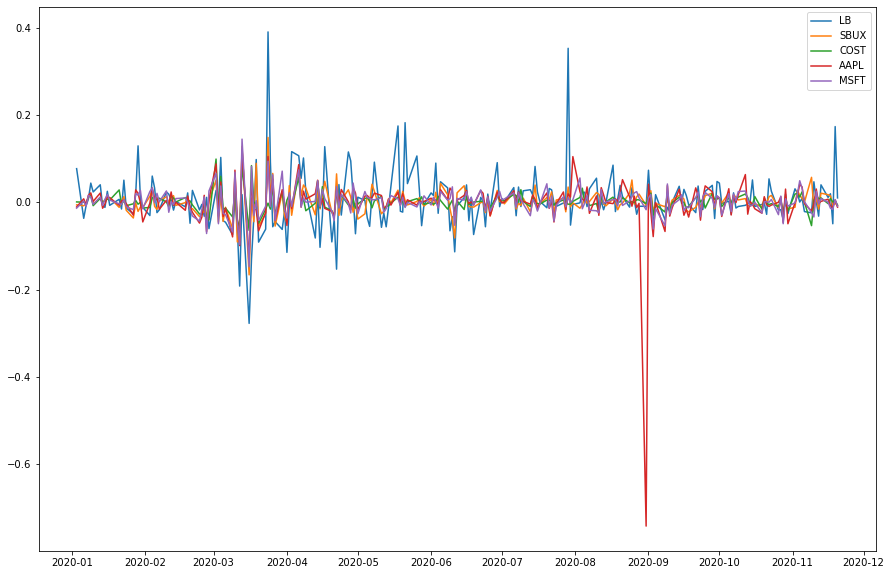

In [22]:
covid_dr.plot(figsize=(15,10))

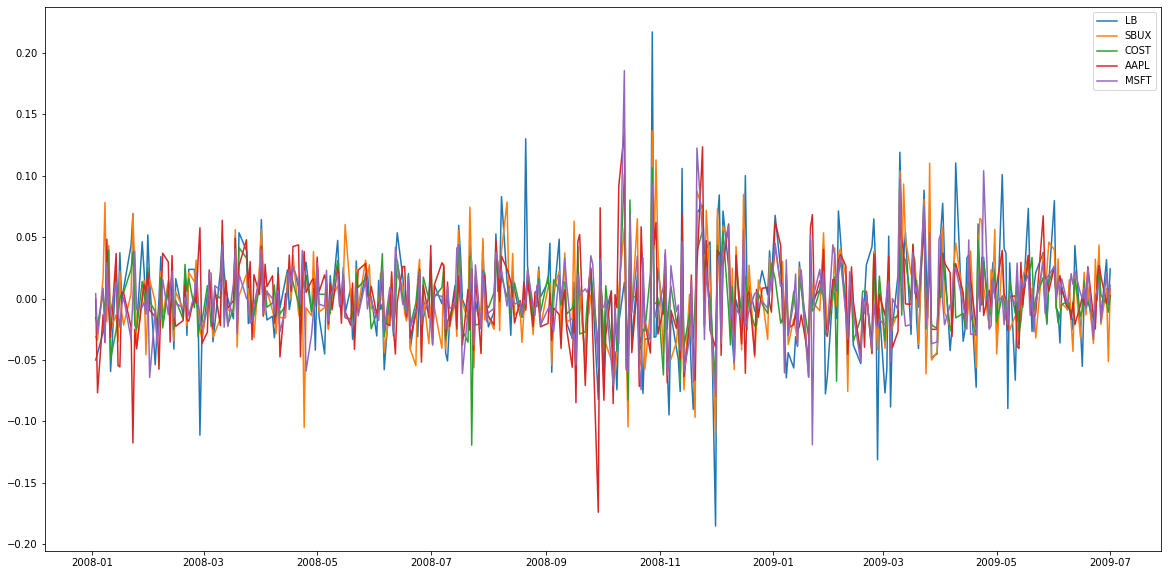

In [18]:
returns2008.plot(figsize=(20,10))

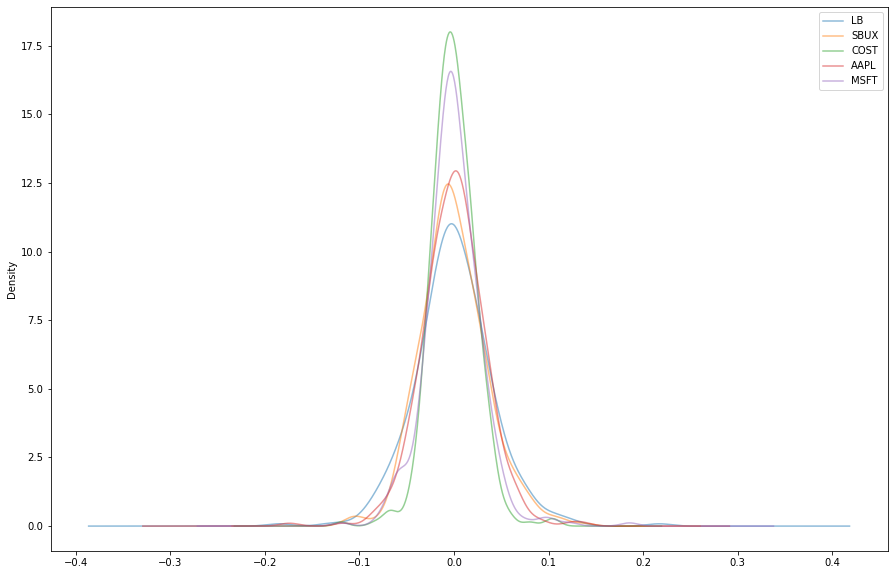

In [23]:
returns2008.plot.density(alpha=.5,figsize=(15,10))

In [ ]:
lb_covar_covid = covid_dr['LB'].cov(covid_dr['S&P 500'])
